# Team Pace Comparison
Rank team's race pace from the fastest to the slowest.


In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt
fastf1.Cache.enable_cache('cache')
# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

Load the race session.
Pick all quick laps (within 107% of fastest lap).
For races with mixed conditions, pick_wo_box() is better.



In [2]:
race = fastf1.get_session(2023, "British Grand Prix", 'R')
race.load()
laps = race.laps.pick_quicklaps()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
logger      WARNING 	Failed to load schedule from F1 API backend!
core           INFO 	Loading data for British Grand Prix - Race [v3.1.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 

Convert the lap time column from timedelta to integer.
This is a seaborn-specific modification.
If plotting with matplotlib, set mpl_timedelta_support to true
with plotting.setup_mpl.



In [3]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

Index(['Red Bull Racing', 'McLaren', 'Mercedes', 'Ferrari', 'Aston Martin',
       'AlphaTauri', 'Williams', 'Alpine', 'Alfa Romeo', 'Haas F1 Team'],
      dtype='object', name='Team')


C:\Users\aryam\AppData\Local\Temp\ipykernel_10644\4194030406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


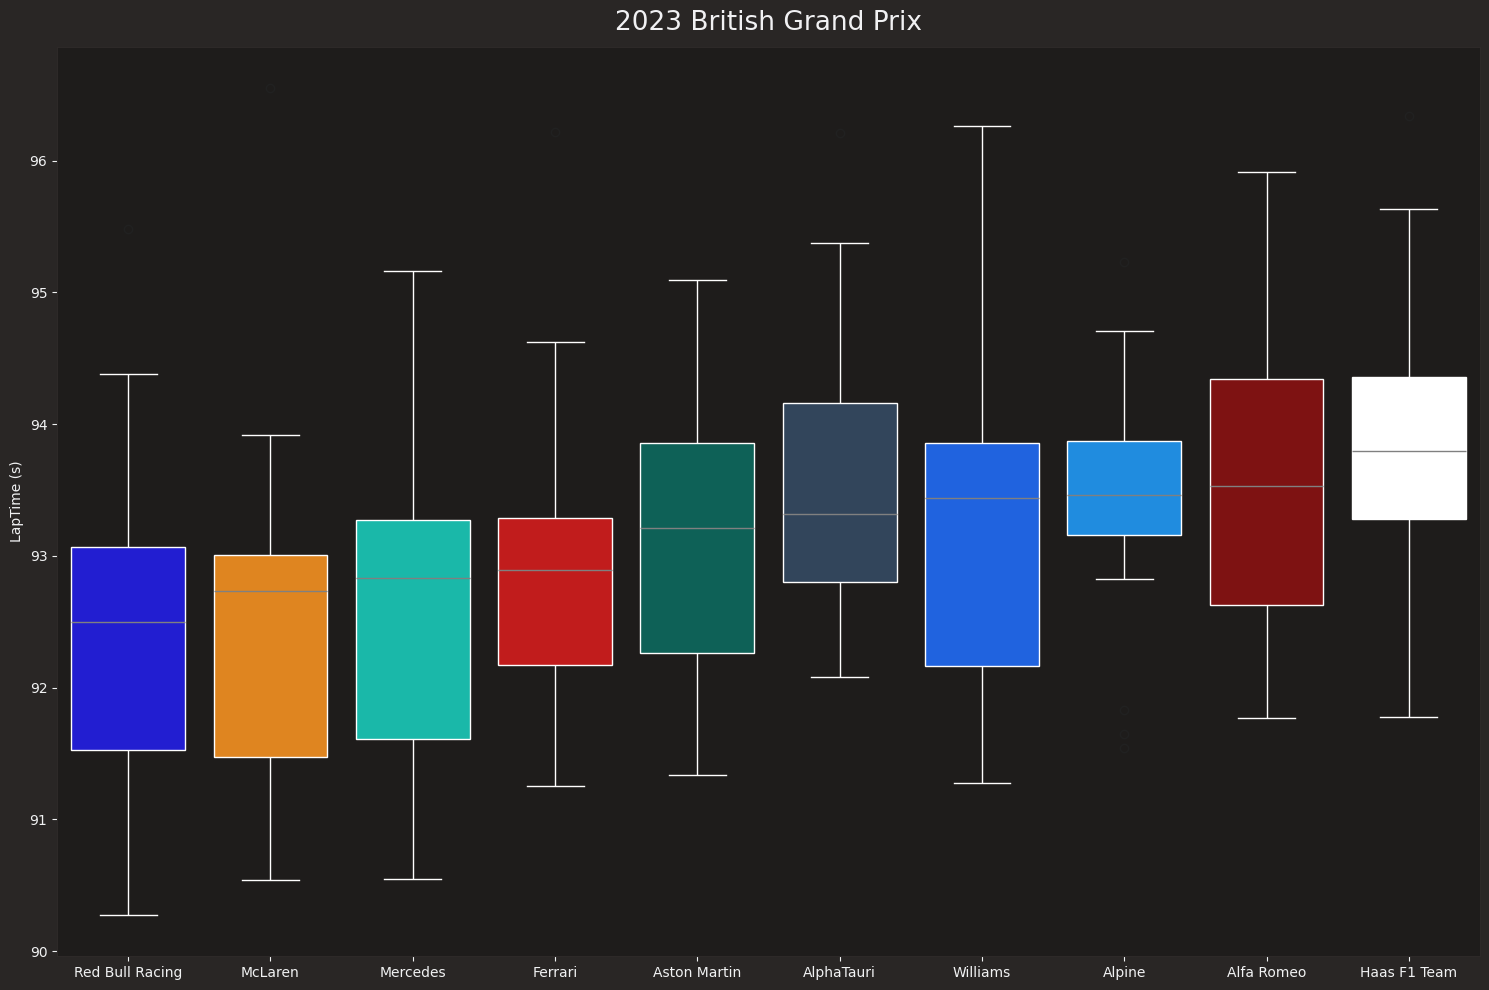

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2023 British Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()